<a href="https://colab.research.google.com/github/maulanaisa/weather-crop-prediction/blob/main/Forecast_revisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

More info (credit) : https://www.tensorflow.org/tutorials/structured_data/time_series

Install Dependencies

In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


Extract Weather Data from excel files

In [ ]:
files = os.listdir(r'/content/drive/MyDrive/Data Cuaca/Stasiun Bandung/')
files.sort()
kolom = ['Tn','Tx','Tavg','RH_avg','RR','ss','ff_x','ddd_x','ff_avg'] #Weather data parameters
df_bandung = pd.DataFrame(columns = kolom)

for file in files :
  a = pd.read_excel(r'/content/drive/MyDrive/Data Cuaca/Stasiun Bandung/' + file,na_values = [8888,9999,"NaN"],header=8)
  a.dropna(axis=0,inplace=True)
  #takes average value of parameters from the table
  df_bandung = df_bandung.append({'Tn':a.mean()[0],'Tx':a.mean()[1],'Tavg':a.mean()[2],'RH_avg':a.mean()[3],'RR':a.mean()[4],
                'ss':a.mean()[5],'ff_x':a.mean()[6],'ddd_x':a.mean()[7],'ff_avg':a.mean()[8]},ignore_index = True)

df_bandung = df_bandung.interpolate(method ='linear', limit_direction ='forward')

#convert ff_avg parameters into 2D vector using ddd_x parameters
ff_x = df_bandung.pop('ff_x')
ddd_x = df_bandung.pop('ddd_x')
wd_rad = ddd_x*np.pi / 180
df_bandung['ff_x'] = ff_x*np.cos(wd_rad)
df_bandung['ff_y'] = ff_x*np.sin(wd_rad)

df_bandung

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_avg,ff_x,ff_y
0,20.791667,27.620833,23.312500,79.458333,2.625000,3.245833,2.416667,2.943141e-01,-4.490365e+00
1,19.750000,28.960714,23.646429,79.500000,6.439286,4.917857,1.821429,-2.611570e-01,-3.096148e+00
2,18.259259,30.370370,23.407407,68.222222,3.807407,6.203704,1.814815,-3.220859e+00,9.371743e-02
3,20.916667,27.808333,23.154167,78.583333,3.454167,3.204167,2.208333,-7.347881e-16,-4.000000e+00
4,19.321429,29.042857,23.146429,77.464286,9.182143,5.292857,1.678571,-2.870328e+00,-7.404088e-01
5,19.000000,30.808333,23.891667,66.458333,1.125000,5.954167,1.750000,-3.070184e+00,9.313300e-01
6,20.935484,28.306452,23.429032,79.354839,6.996774,3.919355,2.161290,-2.078276e+00,-3.530485e+00
7,20.392857,28.678571,23.507143,81.928571,6.103571,4.121429,1.535714,-2.540173e+00,1.596096e+00
8,19.130435,30.065217,23.782609,68.695652,6.986957,6.443478,1.695652,-3.024563e+00,3.387942e-01
9,20.285714,27.014286,23.371429,80.714286,7.871429,2.971429,1.571429,1.246411e-01,3.569253e+00


In [ ]:
files = os.listdir(r'/content/drive/MyDrive/Data Cuaca/Stasiun Bogor/')
files.sort()
kolom = ['Tn','Tx','Tavg','RH_avg','RR','ss','ff_x','ddd_x','ff_avg']
df_bogor = pd.DataFrame(columns = kolom)

for file in files :
  a = pd.read_excel(r'/content/drive/MyDrive/Data Cuaca/Stasiun Bogor/' + file,na_values = [8888,9999,"NaN"],header=8)
  a.dropna(axis=0,inplace=True)
  df_bogor = df_bogor.append({'Tn':a.mean()[0],'Tx':a.mean()[1],'Tavg':a.mean()[2],'RH_avg':a.mean()[3],'RR':a.mean()[4],
                'ss':a.mean()[5],'ff_x':a.mean()[6],'ddd_x':a.mean()[7],'ff_avg':a.mean()[8]},ignore_index = True)

df_bogor = df_bogor.interpolate(method ='linear', limit_direction ='forward')  
ff_x = df_bogor.pop('ff_x')
ddd_x = df_bogor.pop('ddd_x')

wd_rad = ddd_x*np.pi / 180

df_bogor['ff_x'] = ff_x*np.cos(wd_rad)
df_bogor['ff_y'] = ff_x*np.sin(wd_rad)

df_bogor

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_avg,ff_x,ff_y
0,22.740741,29.733333,25.481481,82.407407,7.507407,2.881481,1.037037,1.701676,-3.944928
1,22.966667,31.940000,26.056667,83.833333,12.056667,0.476667,0.500000,-0.731462,-3.046759
2,21.814815,33.114815,26.003704,75.481481,3.922222,7.237037,1.111111,3.477147,-1.040990
3,22.888889,29.629630,25.085185,86.148148,9.448148,2.218519,1.333333,0.630279,-3.574487
4,22.666667,32.314815,26.055556,84.925926,7.214815,5.929630,1.111111,2.021508,-2.556614
5,21.517241,33.668966,25.979310,76.310345,9.327586,7.237931,2.448276,3.777776,-2.002850
6,22.925926,29.600000,25.285185,88.111111,15.033333,2.300000,1.888889,0.245500,-4.215079
7,23.115385,32.042308,26.196154,85.307692,15.357692,4.896154,1.769231,-0.714087,-3.896648
8,22.691026,30.179487,25.403077,87.420513,19.378846,3.553077,1.251282,0.003874,-3.847434
9,22.266667,28.316667,24.610000,89.533333,23.400000,2.210000,0.733333,0.680346,-3.670818


Split data into train and validation data

In [ ]:
n = len(df_bandung)
print(n)
train_df_bandung = df_bandung[0:int(n*0.8)] #80% into training data, remaining into validation data
val_df_bandung = df_bandung[int(n*0.8):]

num_features = df_bandung.shape[1]
val_df_bandung

30


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_avg,ff_x,ff_y
24,20.551613,28.961290,23.680645,79.677419,7.464516,4.270968,2.322581,-0.854689,-5.188135
25,20.055172,29.713793,23.851724,78.689655,8.379310,6.268966,1.620690,-4.269429,-0.805919
26,18.241379,31.889655,23.800000,64.931034,1.896552,7.779310,2.241379,-4.774341,1.233196
27,21.200000,28.953846,23.865385,82.538462,7.984615,3.726923,2.000000,-1.326883,-4.580933
28,20.614286,29.366667,23.904762,82.809524,13.919048,4.057143,1.333333,-3.093364,-1.585875
29,19.883333,30.583333,24.258333,69.416667,2.991667,7.216667,2.000000,-2.335413,3.550823


In [ ]:
n = len(df_bogor)
print(n)
train_df_bogor = df_bogor[0:int(n*0.8)]
val_df_bogor = df_bogor[int(n*0.8):]

num_features = df_bogor.shape[1]
val_df_bogor

30


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_avg,ff_x,ff_y
24,23.206667,30.646667,25.720000,87.400000,8.853333,3.560000,1.133333,1.462727,-3.434852
25,23.040000,32.540000,26.810000,84.300000,29.820000,6.410000,1.000000,-3.814868,-1.202823
26,21.142857,32.571429,25.971429,77.285714,21.657143,7.757143,1.000000,-1.487601,-3.089036
27,23.077778,29.800000,25.727778,90.444444,21.066667,2.966667,1.333333,0.579727,-3.957767
28,23.527273,32.100000,26.681818,85.181818,23.763636,5.245455,1.545455,-3.273099,-2.746456
29,22.400000,33.045455,26.700000,79.363636,15.654545,6.509091,1.636364,-3.550565,-2.838070


Class to create window of consecutive samples from the data

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, 
               train_df, val_df,df,
               label_columns=None):
    self.train_df = train_df
    self.val_df = val_df
    self.df = df

    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

Model makes single prediction one time unit into the future, given 4 time unit of history (one time unit in this example = 4 months of weather data calculated into average)

In [ ]:
width = 4
bandung = WindowGenerator(input_width=width, label_width=1, shift=1,train_df =  train_df_bandung,val_df = val_df_bandung, df = df_bandung ) #create window for model that predict single prediction one time unit into the future, given 4 time unit of history
bogor =  WindowGenerator(input_width=width, label_width=1, shift=1,train_df =  train_df_bogor,val_df = val_df_bogor, df = df_bogor )

bandung
bogor

Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): None

Split data into input and label

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

Convert data array to a tf.data.Dataset of (input_window, label_window)

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=2)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

WindowGenerator.train = train
WindowGenerator.val = val

Model created to predict multiple output multiple time step prediction

Autoregressive predictions is used where the model only makes single step predictions and its output is fed back as its input

In [ ]:
model_bandung = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(width,),
                           activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=num_features),
])

# model_bandung = tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(16, return_sequences=True),
#     tf.keras.layers.LSTM(16, return_sequences=False),
#     # Shape => [batch, time, features]
#     tf.keras.layers.Dense(units=num_features)
# ])


In [ ]:
model_bogor = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(width,),
                           activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=num_features),
])

# model_bogor =  tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(16, return_sequences=True),
#     tf.keras.layers.LSTM(16, return_sequences=False),
#     # Shape => [batch, time, features]
#     tf.keras.layers.Dense(units=num_features)
# ])

epochs = 20

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

Epoch 1/20
10/10 [==============================] - 1s 25ms/step - loss: 19.2858 - val_loss: 18.3735
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 17.3079 - val_loss: 17.1777
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 16.1708 - val_loss: 16.0475
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 14.9743 - val_loss: 14.6590
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 13.4931 - val_loss: 13.1286
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 11.8010 - val_loss: 11.0759
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 10.1203 - val_loss: 9.9104
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 9.1512 - val_loss: 8.7251
Epoch 9/20
10/10 [==============================] - 0s 9ms/step - loss: 8.1882 - val_loss: 7.8032
Epoch 10/20
10/10 [==============================] - 0s 7ms/step - loss: 7.1714 - val_loss: 6.7640
Epoch

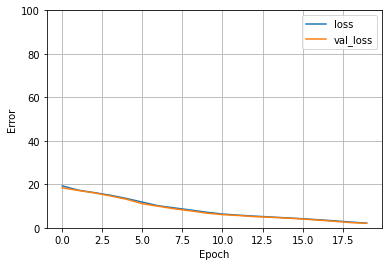

In [ ]:
model_bandung.compile(optimizer=tf.optimizers.Adam(0.0005),
                loss='mean_absolute_error')

history_bandung = model_bandung.fit(bandung.train, epochs=epochs,
                      validation_data=bandung.val)

plot_loss(history_bandung)

Epoch 1/20
10/10 [==============================] - 1s 23ms/step - loss: 22.0705 - val_loss: 21.6333
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 20.6713 - val_loss: 20.1824
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 19.4925 - val_loss: 18.9243
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 18.3607 - val_loss: 17.6038
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 17.0630 - val_loss: 16.0271
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 15.4306 - val_loss: 13.8798
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 13.1850 - val_loss: 10.8685
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 10.3620 - val_loss: 8.2662
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 8.2988 - val_loss: 7.6369
Epoch 10/20
10/10 [==============================] - 0s 8ms/step - loss: 6.9659 - val_loss: 6.7731
Epo

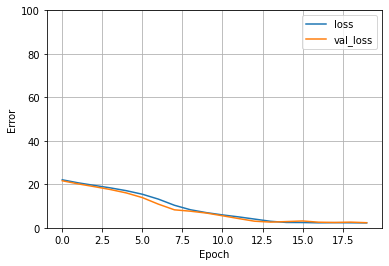

In [ ]:
model_bogor.compile(optimizer=tf.optimizers.Adam(0.0005),
                loss='mean_absolute_error')

history_bogor = model_bogor.fit(bogor.train, epochs=epochs,
                      validation_data=bogor.val)

plot_loss(history_bogor)

Function to predict weather for the next 3 time step [3 x 4 months (1 subround) forward]

In [ ]:
def forecast(subround,location,model_bandung=model_bandung,model_bogor=model_bogor) :
  output  =  []
  df_bandung_copy = df_bandung.copy()
  df_bogor_copy = df_bogor.copy()
  if location == 'Kab.Bandung'  :
    for i in range(subround):
      input = df_bandung_copy[-width:]
      input_forecast = np.array(input)[np.newaxis]
      temp = model_bandung.predict(input_forecast)
      temp = np.squeeze(temp, axis=None)
      output.append(temp)
      df_bandung_copy = df_bandung_copy.append(pd.DataFrame([temp], columns=['Tn','Tx','Tavg','RH_avg','RR','ss','ff_avg','ff_x','ff_y'])) #input latest step prediction to predict next time step
      print(df_bandung_copy)
  if location == 'Kab.Bogor'  :
    for i in range(subround):
      input = df_bogor_copy[-width:]
      input_forecast = np.array(input)[np.newaxis]
      temp = model_bogor.predict(input_forecast)
      temp = np.squeeze(temp, axis=None)
      output.append(temp)
      df_bogor_copy = df_bandung_copy.append(pd.DataFrame([temp], columns=['Tn','Tx','Tavg','RH_avg','RR','ss','ff_avg','ff_x','ff_y']))
      print(df_bandung_copy)
  return output
    

In [ ]:
output = forecast(3,'Kab.Bandung')
print(output)

           Tn         Tx       Tavg  ...    ff_avg          ff_x          ff_y
0   20.791667  27.620833  23.312500  ...  2.416667  2.943141e-01 -4.490365e+00
1   19.750000  28.960714  23.646429  ...  1.821429 -2.611570e-01 -3.096148e+00
2   18.259259  30.370370  23.407407  ...  1.814815 -3.220859e+00  9.371743e-02
3   20.916667  27.808333  23.154167  ...  2.208333 -7.347881e-16 -4.000000e+00
4   19.321429  29.042857  23.146429  ...  1.678571 -2.870328e+00 -7.404088e-01
5   19.000000  30.808333  23.891667  ...  1.750000 -3.070184e+00  9.313300e-01
6   20.935484  28.306452  23.429032  ...  2.161290 -2.078276e+00 -3.530485e+00
7   20.392857  28.678571  23.507143  ...  1.535714 -2.540173e+00  1.596096e+00
8   19.130435  30.065217  23.782609  ...  1.695652 -3.024563e+00  3.387942e-01
9   20.285714  27.014286  23.371429  ...  1.571429  1.246411e-01  3.569253e+00
10  19.888889  29.366667  25.033333  ...  0.666667 -1.800567e+00 -2.259123e+00
11  18.750000  29.200000  23.450000  ...  1.000000  

In [ ]:
# save dataframe
df_bandung.to_csv('./df_bandung.csv',index=False)
df_bogor.to_csv('./df_bogor.csv',index=False)

Save model into .h5 file

In [ ]:
# Save model
model_bandung.save('./model_bandung.h5')
model_bogor.save('./model_bogor.h5')